In [1]:
import torch
import torch.nn as nn

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [3]:
from torchvision.datasets import MNIST, FashionMNIST
from torchvision import transforms

# Define a transform to convert PIL images to PyTorch tensors
transform = transforms.ToTensor()

train_dataset = MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = MNIST(root='./data', train=False, download=True, transform=transform)

100%|██████████| 9.91M/9.91M [00:00<00:00, 21.2MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 539kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.90MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 11.2MB/s]


In [4]:
from torch.utils.data import DataLoader

train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

In [20]:
class AutoEncoder(nn.Module):
    def __init__(self):
        super(AutoEncoder, self).__init__()

        self.encoder = nn.Sequential(
            nn.Linear(28 * 28, 128),
            nn.ReLU(),
            nn.Linear(128, 256),
            nn.ReLU(),
            nn.Linear(256, 1024),
            nn.ReLU(),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Linear(512, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 36),
            nn.ReLU(),
            nn.Linear(36, 18),
            nn.ReLU(),
            nn.Linear(18, 9)
        )
        self.decoder = nn.Sequential(
            nn.Linear(9, 18),
            nn.ReLU(),
            nn.Linear(18, 36),
            nn.ReLU(),
            nn.Linear(36, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 512),
            nn.ReLU(),
            nn.Linear(512, 1024),
            nn.ReLU(),
            nn.Linear(1024, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 28 * 28),
            nn.Sigmoid()
        )


    def forward(self, x):
        x = x.view(-1, 28 * 28)
        enc = self.encoder(x)
        dec = self.decoder(enc)
        return dec

In [21]:
from torch.optim import Adam

model = AutoEncoder()
loss_func = nn.MSELoss()
optimizer = Adam(model.parameters(), lr=1e-3)

model.to(device)

AutoEncoder(
  (encoder): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=256, bias=True)
    (3): ReLU()
    (4): Linear(in_features=256, out_features=1024, bias=True)
    (5): ReLU()
    (6): Linear(in_features=1024, out_features=512, bias=True)
    (7): ReLU()
    (8): Linear(in_features=512, out_features=128, bias=True)
    (9): ReLU()
    (10): Linear(in_features=128, out_features=64, bias=True)
    (11): ReLU()
    (12): Linear(in_features=64, out_features=36, bias=True)
    (13): ReLU()
    (14): Linear(in_features=36, out_features=18, bias=True)
    (15): ReLU()
    (16): Linear(in_features=18, out_features=9, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=9, out_features=18, bias=True)
    (1): ReLU()
    (2): Linear(in_features=18, out_features=36, bias=True)
    (3): ReLU()
    (4): Linear(in_features=36, out_features=64, bias=True)
    (5): ReLU()
    (6): Linear(in_

In [23]:
from tqdm import tqdm_notebook
EPOCHS = 30

model.train()
for epoch in range(EPOCHS):
    for im, _ in tqdm_notebook(train_loader):
        im = im.to(device)
        im_flat = im.view(-1, 28 * 28)
        rec = model(im)
        loss = loss_func(rec, im_flat)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epoch: {epoch+1}, loss: {loss.item()}')

/tmp/ipython-input-494605736.py:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for im, _ in tqdm_notebook(train_loader):


  0%|          | 0/938 [00:00<?, ?it/s]

Epoch: 1, loss: 0.05050945281982422


  0%|          | 0/938 [00:00<?, ?it/s]

Epoch: 2, loss: 0.06089019030332565


  0%|          | 0/938 [00:00<?, ?it/s]

Epoch: 3, loss: 0.037821438163518906


  0%|          | 0/938 [00:00<?, ?it/s]

Epoch: 4, loss: 0.04415693134069443


  0%|          | 0/938 [00:00<?, ?it/s]

Epoch: 5, loss: 0.040607698261737823


  0%|          | 0/938 [00:00<?, ?it/s]

Epoch: 6, loss: 0.03638846054673195


  0%|          | 0/938 [00:00<?, ?it/s]

Epoch: 7, loss: 0.040456704795360565


  0%|          | 0/938 [00:00<?, ?it/s]

Epoch: 8, loss: 0.033706244081258774


  0%|          | 0/938 [00:00<?, ?it/s]

Epoch: 9, loss: 0.033105190843343735


  0%|          | 0/938 [00:00<?, ?it/s]

Epoch: 10, loss: 0.0373607873916626


  0%|          | 0/938 [00:00<?, ?it/s]

Epoch: 11, loss: 0.03308350220322609


  0%|          | 0/938 [00:00<?, ?it/s]

Epoch: 12, loss: 0.032038357108831406


  0%|          | 0/938 [00:00<?, ?it/s]

Epoch: 13, loss: 0.03297700732946396


  0%|          | 0/938 [00:00<?, ?it/s]

Epoch: 14, loss: 0.02923971228301525


  0%|          | 0/938 [00:00<?, ?it/s]

Epoch: 15, loss: 0.0307103730738163


  0%|          | 0/938 [00:00<?, ?it/s]

Epoch: 16, loss: 0.02931680716574192


  0%|          | 0/938 [00:00<?, ?it/s]

Epoch: 17, loss: 0.035499006509780884


  0%|          | 0/938 [00:00<?, ?it/s]

Epoch: 18, loss: 0.029915794730186462


  0%|          | 0/938 [00:00<?, ?it/s]

Epoch: 19, loss: 0.03274493291974068


  0%|          | 0/938 [00:00<?, ?it/s]

Epoch: 20, loss: 0.03661685809493065


  0%|          | 0/938 [00:00<?, ?it/s]

Epoch: 21, loss: 0.03164774551987648


  0%|          | 0/938 [00:00<?, ?it/s]

Epoch: 22, loss: 0.0382394976913929


  0%|          | 0/938 [00:00<?, ?it/s]

Epoch: 23, loss: 0.028329428285360336


  0%|          | 0/938 [00:00<?, ?it/s]

Epoch: 24, loss: 0.03497568517923355


  0%|          | 0/938 [00:00<?, ?it/s]

Epoch: 25, loss: 0.031071513891220093


  0%|          | 0/938 [00:00<?, ?it/s]

Epoch: 26, loss: 0.028516514226794243


  0%|          | 0/938 [00:00<?, ?it/s]

Epoch: 27, loss: 0.029020071029663086


  0%|          | 0/938 [00:00<?, ?it/s]

Epoch: 28, loss: 0.028122881427407265


  0%|          | 0/938 [00:00<?, ?it/s]

Epoch: 29, loss: 0.03060339391231537


  0%|          | 0/938 [00:00<?, ?it/s]

Epoch: 30, loss: 0.02748270519077778


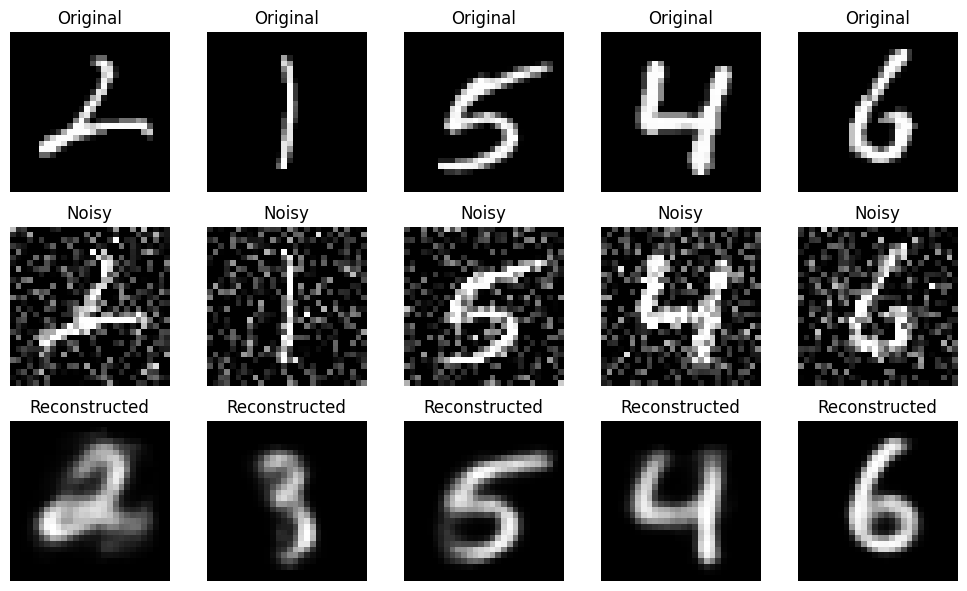

In [41]:
import matplotlib.pyplot as plt
import numpy as np
import random

model.eval() # Set the model to evaluation mode

with torch.no_grad(): # Disable gradient calculation during inference
    dataiter = iter(test_loader)
    images, _ = next(dataiter)

    # Select 5 random indices from the current batch
    random_indices = random.sample(range(len(images)), 5)
    images = images[random_indices].to(device)

    # Add Gaussian noise
    noise = torch.randn_like(images) * 0.3  # Adjust noise intensity as needed
    noisy_images = torch.clamp(images + noise, 0., 1.) # Clamp to ensure pixel values are between 0 and 1

    reconstructed_images = model(noisy_images)

    fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(10, 6))

    for i in range(5):
        # Original Image
        ax = axes[0, i]
        ax.imshow(images[i].cpu().squeeze().numpy(), cmap='gray')
        ax.set_title("Original")
        ax.axis('off')

        # Noisy Image
        ax = axes[1, i]
        ax.imshow(noisy_images[i].cpu().squeeze().numpy(), cmap='gray')
        ax.set_title("Noisy")
        ax.axis('off')

        # Reconstructed Image
        ax = axes[2, i]
        # Reshape the 1D reconstructed image to 2D (28x28) for display
        ax.imshow(reconstructed_images[i].cpu().numpy().reshape(28, 28), cmap='gray')
        ax.set_title("Reconstructed")
        ax.axis('off')

    plt.tight_layout()
    plt.show()